In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D,GlobalAveragePooling2D,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
data_dir = r"C:\Users\ymts0418\Documents\projects\MAY\business\TK100499 - TRAFFIC SIGN\SOURCE CODE-YMTS-0418\CODE\backend\dataset\Train"
traffic=[]
for file in os.listdir(data_dir):
    traffic+=[file]
print(traffic)
print(len(traffic))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']
43


In [3]:
img_height,img_width=256,256
batch_size=20

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 27447 images belonging to 43 classes.
Found 11762 images belonging to 43 classes.


In [4]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()

In [5]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [6]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_height,img_width,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(43, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy',precision,recall])
hist=model.fit(train_generator,epochs=5,validation_data=test_generator)
model.save(r"webapp\home\models\cnn.h5")

Epoch 1/5
1373/1373 [==============================] - 12172s 9s/step - loss: 0.8832 - accuracy: 0.7448 - precision: 0.9016 - recall: 0.6653 - val_loss: 1.0238 - val_accuracy: 0.7568 - val_precision: 0.8027 - val_recall: 0.7262
Epoch 2/5
1373/1373 [==============================] - 11884s 9s/step - loss: 0.1875 - accuracy: 0.9434 - precision: 0.9579 - recall: 0.9308 - val_loss: 0.9413 - val_accuracy: 0.8072 - val_precision: 0.8379 - val_recall: 0.7930
Epoch 3/5
1373/1373 [==============================] - 10054s 7s/step - loss: 0.1229 - accuracy: 0.9647 - precision: 0.9722 - recall: 0.9580 - val_loss: 0.8439 - val_accuracy: 0.8170 - val_precision: 0.8404 - val_recall: 0.8026
Epoch 4/5
1373/1373 [==============================] - 7906s 6s/step - loss: 0.0774 - accuracy: 0.9781 - precision: 0.9816 - recall: 0.9752 - val_loss: 1.1069 - val_accuracy: 0.8174 - val_precision: 0.8361 - val_recall: 0.8086
Epoch 5/5
1373/1373 [==============================] - 7935s 6s/step - loss: 0.0695 - acc

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


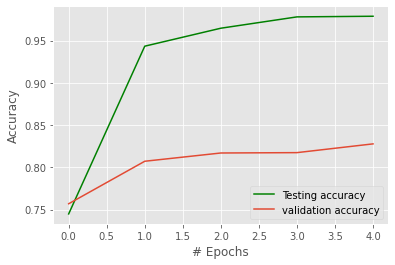

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  del sys.path[0]


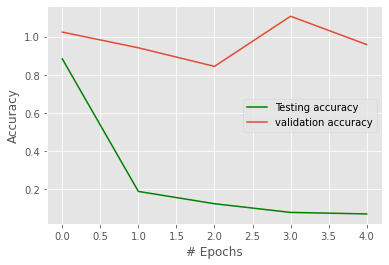

In [8]:

plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history['accuracy'],'r',label='Testing accuracy',color='green')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("cnn_acc.png")
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history['loss'],'r',label='Testing accuracy',color='green')
plt.plot(hist.history['val_loss'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("cnn_loss.png")
plt.show()


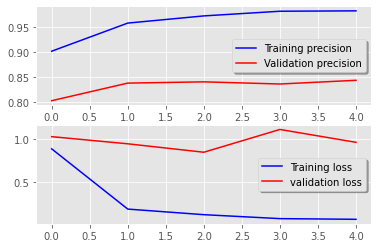

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['precision'], color='b', label="Training precision")
ax[0].plot(hist.history['val_precision'], color='r',label="Validation precision")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [11]:
filenames = test_generator.filenames
nb_samples = len(filenames)
model_predict = model.predict_generator(test_generator,steps = nb_samples, verbose=2)

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


11762/11762 - 685s - 685s/epoch - 58ms/step


Confusion matrix, without normalization
[[ 1  2  0 ...  4  2  4]
 [ 4 30 27 ... 21 24 23]
 [ 2 29 32 ... 19 20 20]
 ...
 [ 3 22 18 ...  8 14 16]
 [ 4 20 27 ... 11 13 14]
 [ 2 28 16 ... 13 17 24]]


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

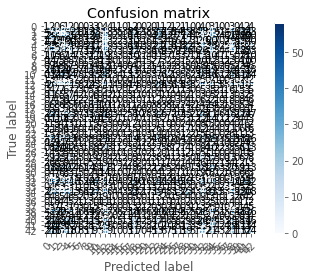

In [12]:
y_true = test_generator.classes
y_pred = model_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['0','1','2','3','4','5','6','7','8','9','10',
'11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30',
'31','32','33','34','35','36','37','38','39','40','41','42'],
                      title='Confusion matrix')